# Digit Recognition

Using the digits dataset from sklearn, different classifier models are tested.

In [46]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, tree, svm, linear_model, metrics
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report

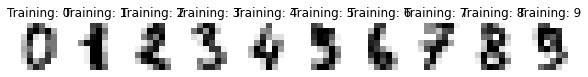

In [47]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=10, figsize=(10,3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' %label)

In [49]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

X = data
y = digits.target

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, random_state=0)


# test
def test_classifier(predicted, clf):
    _, axes = plt.subplots(nrows=1, ncols=7, figsize=(10,3))
    for ax, image, prediction in zip(axes, X_test, predicted):
        ax.set_axis_off()
        image = image.reshape(8,8)
        ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
        ax.set_title(f'Prediction: {prediction}')

    print(f"Classifier score: {clf.score(X_test, y_test)}")

    print(f"Classification report for classifier {clf}:\n"
          f"{metrics.classification_report(y_test, predicted)}\n")
    
# cross validation
def cross_validate(X, y, clf, cv):
    scores = cross_val_score(clf, X, y, cv=cv)
    print(f"Cross validation score, using {cv} ")
    for i, score in enumerate(scores):
        print(f"Test {i}: {score}")
    print(f"Mean score: {np.mean(scores)}, std: {np.std(scores)}")
    
    
def grid_search_params(parameters, clf):
    g = GridSearchCV(clf, parameters)
    g.fit(X, y)
    return g.best_params_

### K Nearest Neighbours

In [50]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# find optimal K
k_values = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10]}
best_k = grid_search_params(k_values, knn)
print(f"Optimal setting: {best_k}")

Optimal setting: {'n_neighbors': 2}


In [53]:
knn = KNeighborsClassifier(n_neighbors=best_k['n_neighbors'])
#knn.fit(X_train, y_train)

#predicted = knn.predict(X_test)

#test_classifier(predicted, knn)
cross_validate(X, y, knn, 10)

Cross validation score, using 10 
Test 0: 0.9388888888888889
Test 1: 0.9888888888888889
Test 2: 0.9888888888888889
Test 3: 0.9611111111111111
Test 4: 0.9611111111111111
Test 5: 0.9833333333333333
Test 6: 0.9888888888888889
Test 7: 0.9776536312849162
Test 8: 0.9776536312849162
Test 9: 0.9776536312849162
Mean score: 0.974407200496586, std: 0.015347879747506963


### Decision Tree

In [54]:
# create decision tree classifier
dec_tree = tree.DecisionTreeClassifier()

params = {'max_depth': [1,2,3,4,5,6,7,8,9,10,15,20]}
best_p = grid_search_params(params, dec_tree)
print(f"Optimal setting: {best_p}")

dec_tree = tree.DecisionTreeClassifier(max_depth=best_p['max_depth'])

#dec_tree = clf.fit(X_train, y_train)
#predicted = dec_tree.predict(X_test)
#test_classifier(predicted, dec_tree)

cross_validate(X, y, dec_tree, 10)

Optimal setting: {'max_depth': 10}
Cross validation score, using 10 
Test 0: 0.7888888888888889
Test 1: 0.8666666666666667
Test 2: 0.85
Test 3: 0.7722222222222223
Test 4: 0.7555555555555555
Test 5: 0.8944444444444445
Test 6: 0.8888888888888888
Test 7: 0.8435754189944135
Test 8: 0.776536312849162
Test 9: 0.8156424581005587
Mean score: 0.82524208566108, std: 0.047914738687173886


### Support Vector Machine

In [55]:
# create support vector machine classifier
svm = svm.SVC()

param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

best_p = grid_search_params(param_grid, sv)
print(f"Optimal setting: {best_p}")

#svm.fit(X_train, y_train)
#predicted = svm.predict(X_test)
#test_classifier(predicted, svm)

cross_validate(X, y, svm, 10)

Cross validation score, using 10 
Test 0: 0.9111111111111111
Test 1: 0.9611111111111111
Test 2: 0.8722222222222222
Test 3: 0.8722222222222222
Test 4: 0.9388888888888889
Test 5: 0.9111111111111111
Test 6: 0.9722222222222222
Test 7: 0.9441340782122905
Test 8: 0.9162011173184358
Test 9: 0.9106145251396648
Mean score: 0.9209838609559279, std: 0.03189486388046007


In [8]:
print(svm.get_params())

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.005, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
